In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [289]:
df = pd.read_csv('Data/c.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


get AVG for Sales in NA

In [290]:
df.NA_Sales.mean()

0.2633303427238687

get MIN and MAX for Sales in NA

In [291]:
print(df.NA_Sales.min(), df.NA_Sales.max())

0.0 41.36


calculate STD for Sales in NA

In [292]:
df.NA_Sales.std()

0.8135138347516405

calculate the most freaquency genre

In [294]:
df.Genre.value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Add new column: 1 for PS3, 0 for other

In [296]:
df['Platform_Coded'] = np.where(df.Platform == 'PS3', 1, 0)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Coded
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,0


Calculate AVG for new column

In [297]:
df.Platform_Coded.mean()

0.07961002452299779

Calculate AVG score for specific companies

In [303]:
df_TK_W = df[(df.Publisher == "Tecmo Koei") | (df.Publisher == "Wanadoo")]
df_TK_W.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Coded
784,Dynasty Warriors 4,PS2,2003.0,Action,Tecmo Koei,0.63,0.21,1.13,0.13,2.11,78.0,24.0,9.3,201.0,Omega Force,T,0
1391,Dynasty Warriors 5,PS2,2005.0,Action,Tecmo Koei,0.24,0.18,0.91,0.06,1.39,69.0,29.0,8.8,68.0,Omega Force,T,0
2049,Ninja Gaiden II,X360,2008.0,Action,Tecmo Koei,0.65,0.22,0.05,0.10,1.01,81.0,74.0,8,302.0,"Team Ninja, Tecmo",M,0
2054,Monster Rancher,PS,1997.0,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07,1.01,86.0,5.0,8.3,10.0,Tecmo,NaN,0
2061,Dead or Alive 2,PS2,2000.0,Fighting,Tecmo Koei,0.30,0.24,0.38,0.08,1.00,NaN,NaN,NaN,NaN,NaN,NaN,0


In [304]:
df_TK_W.Critic_Score.mean()

65.60135135135135

Определяем пропущенные значения

In [305]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
Platform_Coded        0
dtype: int64

In [306]:
df.Developer.value_counts()

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: Developer, Length: 1696, dtype: int64

In [307]:
top_value = df.Developer.value_counts().index[0]
df_mode = df.Developer.fillna(top_value)
df_mode

0        Nintendo
1         Ubisoft
2        Nintendo
3        Nintendo
4         Ubisoft
           ...   
16714     Ubisoft
16715     Ubisoft
16716     Ubisoft
16717     Ubisoft
16718     Ubisoft
Name: Developer, Length: 16719, dtype: object

In [308]:
df_mode.value_counts()

Ubisoft                                   6827
EA Sports                                  172
EA Canada                                  167
Konami                                     162
Capcom                                     139
                                          ... 
Genki, Kojima Productions                    1
Warner Bros. Interactive Entertainment       1
THQ, Altron                                  1
Netherock Ltd.                               1
Interchannel-Holon                           1
Name: Developer, Length: 1696, dtype: int64

Визуализация

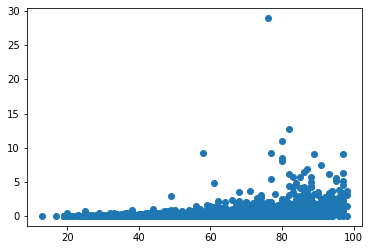

In [309]:
plt.scatter(df.Critic_Score, df.EU_Sales)

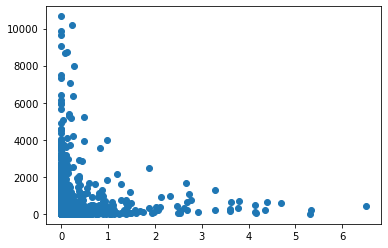

In [310]:
plt.scatter(df.JP_Sales, df.User_Count)

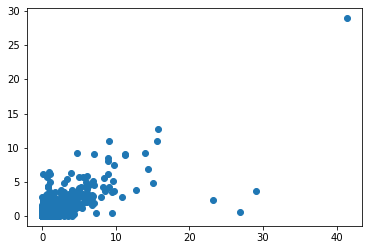

In [311]:
plt.scatter(df.NA_Sales, df.EU_Sales)

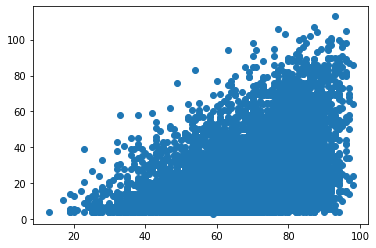

In [312]:
plt.scatter(df.Critic_Score, df.Critic_Count)

Строим модель линейной регресии

In [313]:
df.corr() #корреляция

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform_Coded
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339,0.217464
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429,0.011679
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360,0.060266
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638,-0.016528
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982,0.086018
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012,0.032731
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376,0.033993
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334,0.133001
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000,0.028118
Platform_Coded,0.217464,0.011679,0.060266,-0.016528,0.086018,0.032731,0.033993,0.133001,0.028118,1.000000


In [314]:
X = np.log(1 + df.NA_Sales)
y = df.Global_Sales
X_const = sm.add_constant(X)

In [315]:
mod = sm.OLS(y, X_const)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 2.627e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:39:04   Log-Likelihood:                -23133.
No. Observations:               16719   AIC:                         4.627e+04
Df Residuals:                   16717   BIC:                         4.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2168      0.009    -24.677      0.000      -0.234      -0.200
NA_Sales       4.3024      0.027    162.067      0.000       4.250       4.354
==============================================================================
Omnibus:                    41460.166   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1536475018.250
Skew:                          26.334   Prob(JB):                         0.00
Kurtosis:                    1487.192   Cond. No.                         3.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Test

In [242]:
import scipy.stats

In [243]:
y = 0 - 0.01*15 + 0.2*4
p = 1 / (1 + np.exp(-y))
p

0.6570104626734988

In [251]:
reg1 = pd.DataFrame([103.01, 101.99, 105.21, 106.80, 112.70, 106.13, 110.48, 109.26, 100.44, 100.28])[0]
reg2 = pd.DataFrame([107.38, 106.31, 106.00, 105.27, 105.27, 104.66, 103.70, 105.07, 105.12, 104.74])[0]

scipy.stats.ttest_ind(reg1, reg2, equal_var = False)

Ttest_indResult(statistic=0.2003211139915275, pvalue=0.8452433630336529)

In [264]:
mean1 = reg1.mean()
mean2 = reg2.mean()
print(mean1, mean2)

105.63 105.352


In [272]:
s1 = ((reg1 - mean1)**2).sum() / (len(reg1) - 1)
s2 = ((reg2 - mean2)**2).sum() / (len(reg2) - 1)
print(s1, s2)

18.23913333333335 1.0199733333333323


In [274]:
s_m1_m2 = np.sqrt(s1/len(reg1) + s2/len(reg2))
s_m1_m2

1.387771835233252

In [276]:
(mean1 - mean2) / s_m1_m2

0.2003211139915275

In [277]:
fuel_vol = pd.DataFrame([50.1, 53.2, 55.0, 55.0, 50.2])[0]
km = pd.DataFrame([15.2, 4.75, 1.2, 1.9, 9.3])[0]
fuel_vol.corr(km)

-0.9360049952990245

In [284]:
cab = pd.DataFrame({'Almaz':[75, 20], 'Matrosik':[20, 120], 'Snowy':[55, 10]})
cab

,Almaz,Matrosik,Snowy
0,75,20,55
1,20,120,10


In [285]:
scipy.stats.chi2_contingency(cab, correction=False)

(134.42452284557547,
 6.457817206943809e-30,
 2,
 array([[47.5, 70. , 32.5],
        [47.5, 70. , 32.5]]))